# STEPS TO  BUILD AND EVALUATE THE MODEL

1.    Importing Libraries and Dataset.
2.    Scaling the dataset.
3.    Creating test and training partitions.
4.    Implementing the Models.
    a.    Multiple Linear Regression
    b.    Random Forest Regression
    c.    XGBoost Regression
5.    Generating predictions over the train and test dataset for the above models.
6.    Evaluating the models.
7.    Preparing the Residual plot.
8.    Predicting Sales Price

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

# IMPORTING PREPROCESSED DATASET

In [2]:
data = pd.read_csv("Transformed Housing Data.csv")
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


# SCALING THE DATASET

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price','ID']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price','ID']).columns)
X

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.598777,-0.337386,2.789023,-0.30579,0.340581,-0.311996,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,0.250594,-0.224356,0.936817,-0.30579,0.340581,0.630080,-0.658697,-1.463938,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-1.154135,-0.332099,0.936817,-0.30579,-0.563993,-0.927969,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.522551,-0.307041,0.936817,-0.30579,0.340581,-0.227451,-0.658697,-1.123485,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# TRAIN TEST SET

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17287, 30), (4322, 30), (17287,), (4322,))

# BUILDING MODEL

# LINEAR REGRESSION

In [5]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)#Gradient Descent

LinearRegression(normalize=True)

In [6]:
lr.coef_

array([ -3766.81298578,  12122.60904502,  42755.52499781,  14267.30774747,
         3316.3107281 ,  27595.66504836,  57265.90031327,  41507.01982117,
         7511.85852948,  27856.93036536,  23001.67801966, -23613.58159667,
        20090.77973857,  -3092.54808725, -12016.22815553,  30609.45594076,
        28379.03992038,  31665.17464838,   3244.28988475,  15985.07966037,
         9171.89208389,  12093.5533752 ,  33132.30341301,  60767.62608277,
        79774.46636636,  50044.7984537 ,  72837.78434749,  39972.61392237,
        67616.45270632,  20730.5561518 ])

# PREDICTIONS OVER TEST AND TRAIN DATASET

In [7]:
from sklearn.metrics import r2_score
pred_train=lr.predict(x_train)
print("Linear Regression Training Accuracy :", r2_score(y_train,pred_train)*100)

Linear Regression Training Accuracy : 84.18995503286611


In [8]:
pred_test = lr.predict(x_test)
print("Linear Regression Testing Accuracy :", r2_score(y_test,pred_test)*100)

Linear Regression Testing Accuracy : 84.71840768253568


# RESIDUAL PLOT

In [9]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [10]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

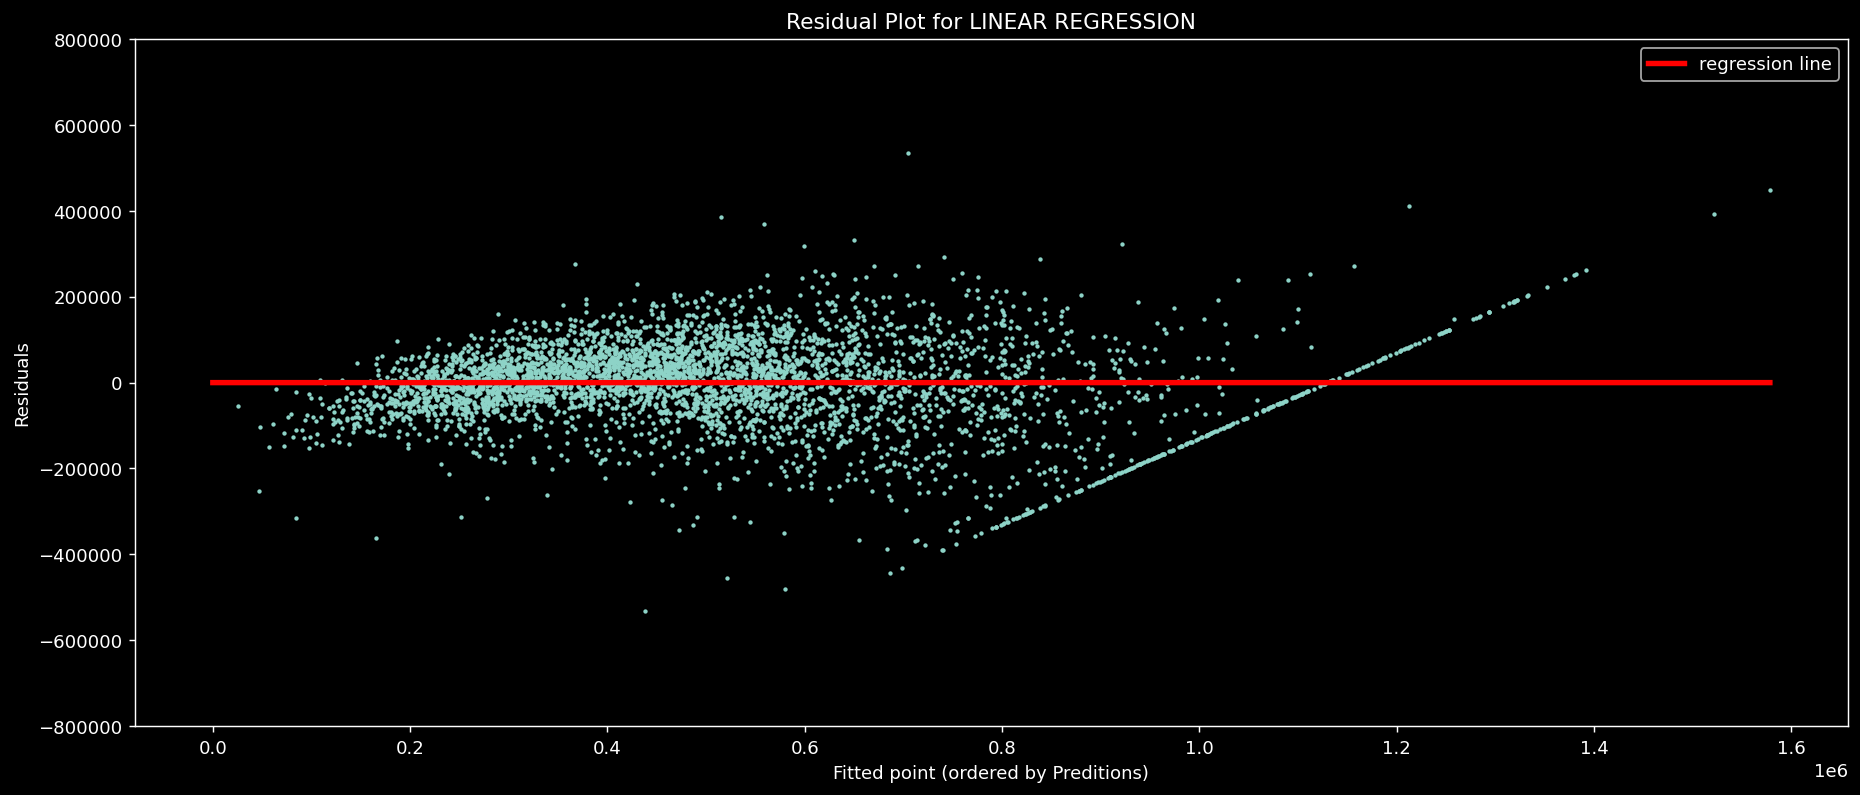

In [11]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for LINEAR REGRESSION')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR

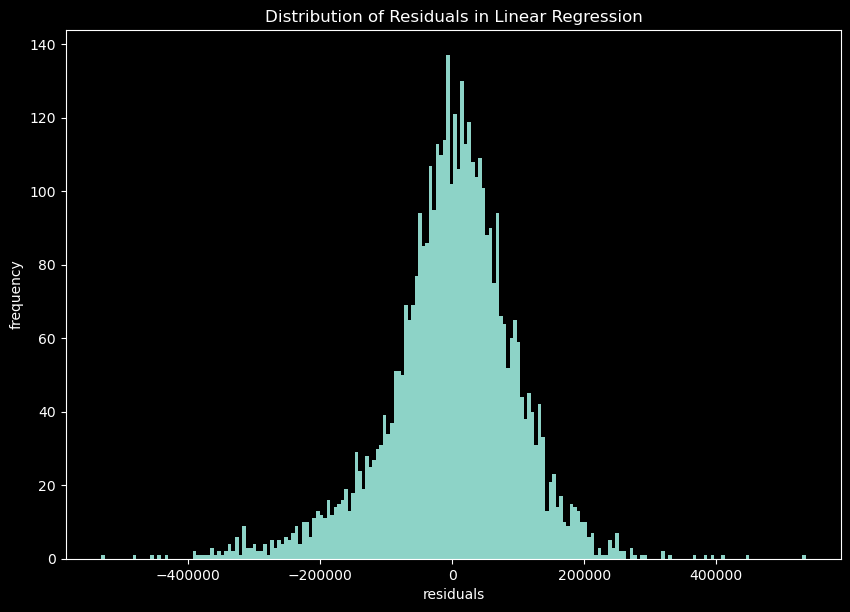

In [12]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in Linear Regression')
plt.show()

# MODEL COEFFICIENTS

In [13]:
coeff_table = pd.DataFrame({'columns': x_train.columns,'coefficients': lr.coef_})
coeff_table = coeff_table.sort_values(by = 'coefficients')

Text(0.5, 1.0, 'Normalized Coefficients plot')

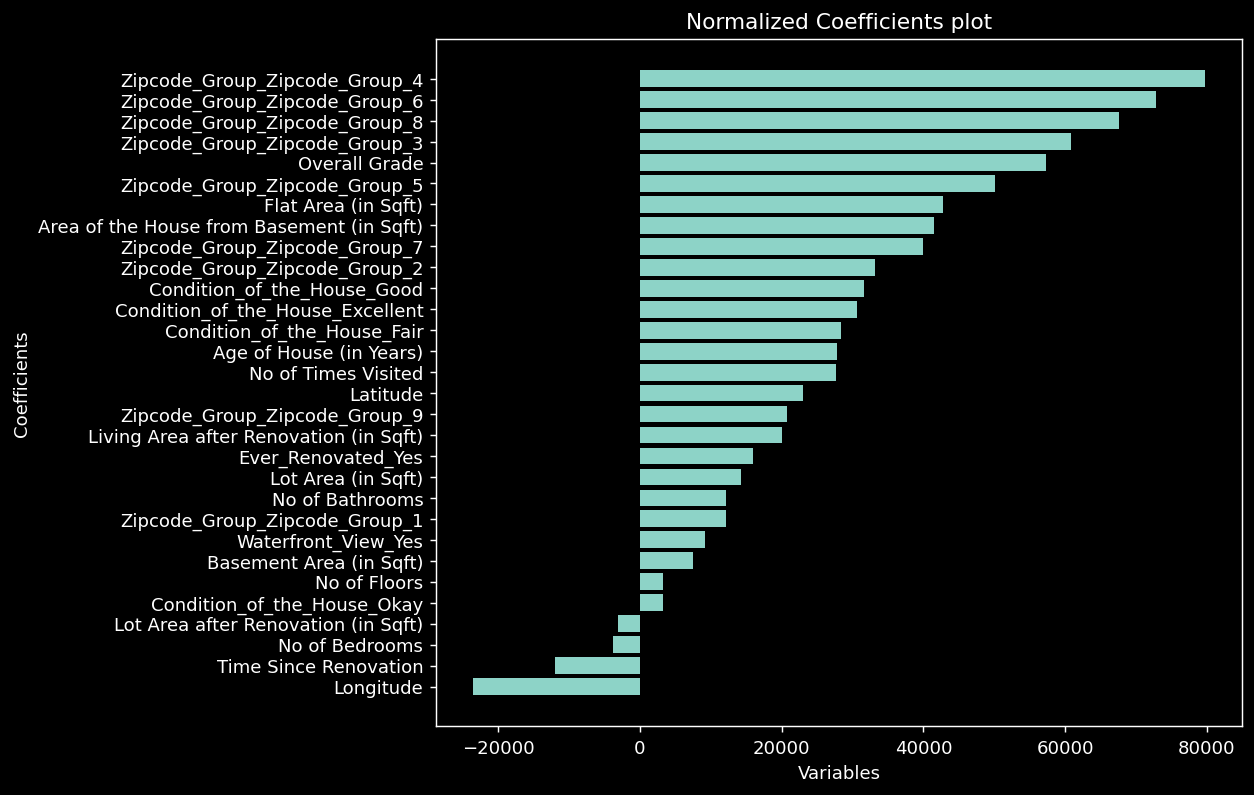

In [14]:
plt.figure(dpi=130, figsize=(8,7))
x=coeff_table['columns']
y=coeff_table['coefficients']
plt.barh(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficients plot')

# RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

# PREDICTIONS OVER TRAIN AND TEST DATASET

In [16]:
pred_train=reg.predict(x_train)
print("Random Forest Training Accuracy :", r2_score(y_train,pred_train)*100)

Random Forest Training Accuracy : 98.3835463373892


In [17]:
pred_test = reg.predict(x_test)
print("Random Forest Testing Accuracy :", r2_score(y_test,pred_test)*100)

Random Forest Testing Accuracy : 89.90828439829431


# RESIDUAL PLOT

In [18]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [19]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

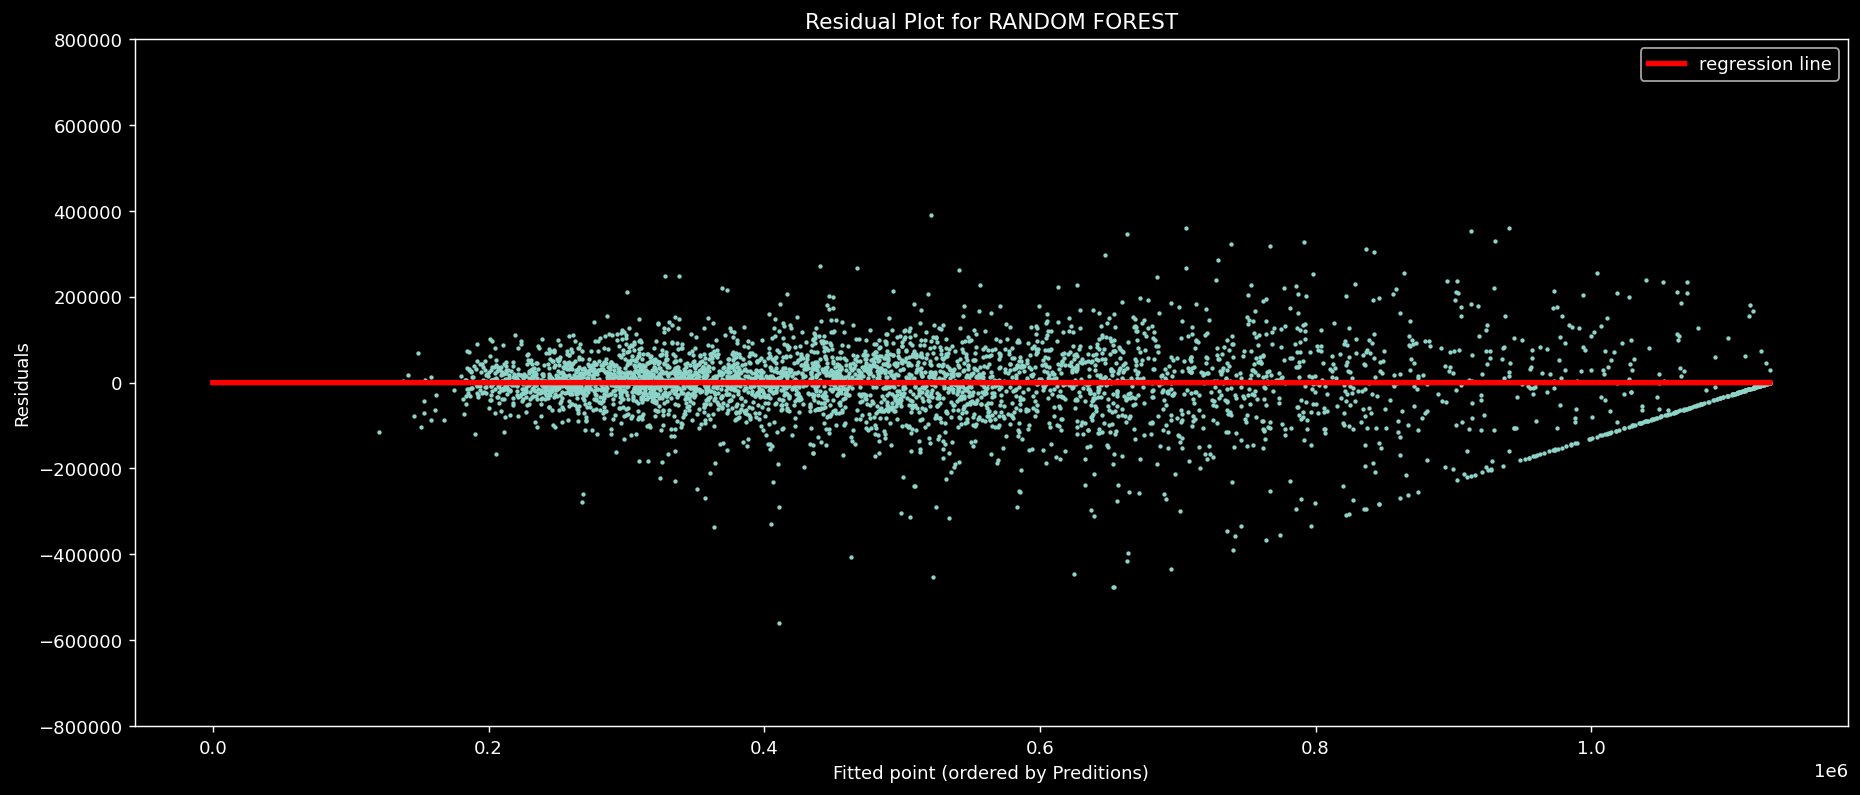

In [20]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for RANDOM FOREST')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR

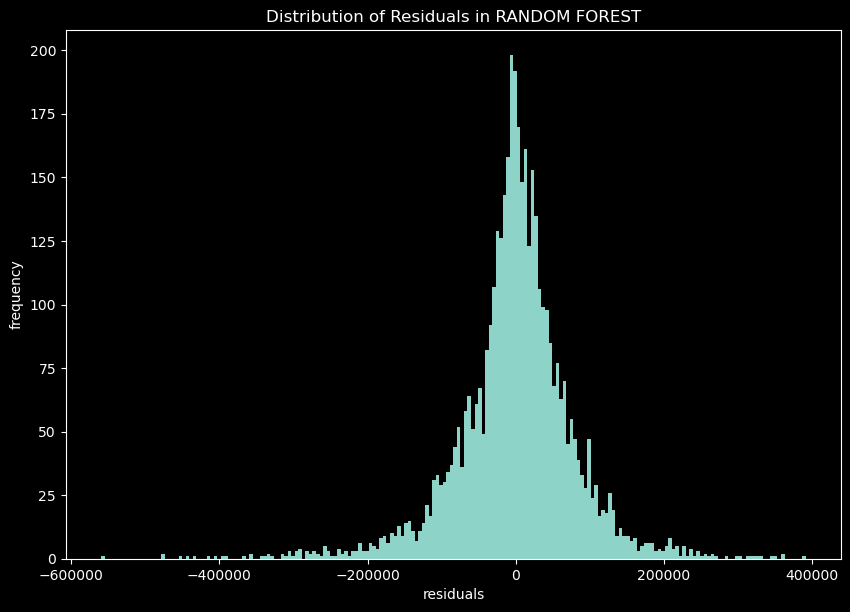

In [21]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in RANDOM FOREST')
plt.show()

# XGBOOST 

In [22]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

# PREDICTIONS OVER TRAIN AND TEST DATASET

In [23]:
pred_train=xgb.predict(x_train)
print("XGBoost Training Accuracy :", r2_score(y_train,pred_train)*100)

XGBoost Training Accuracy : 84.10015198037722


In [24]:
pred_test=xgb.predict(x_test)
print("XGBoost Testing Accuracy :", r2_score(y_test,pred_test)*100)

XGBoost Testing Accuracy : 83.21070898829193


# RESIDUAL PLOT

In [25]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [26]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

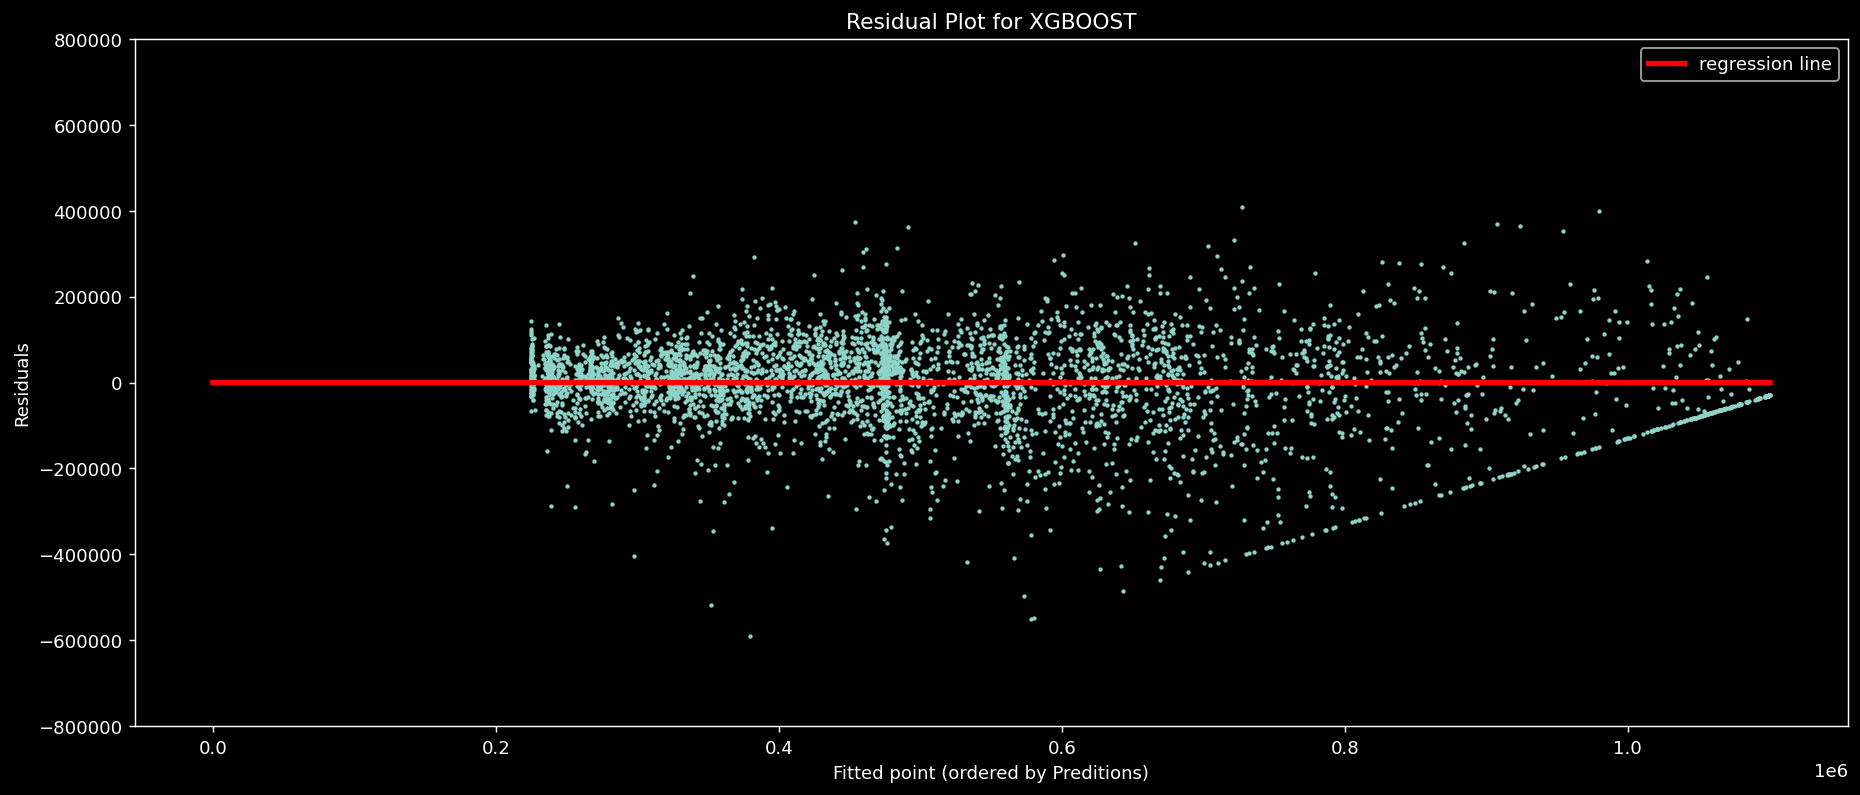

In [27]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBOOST')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR


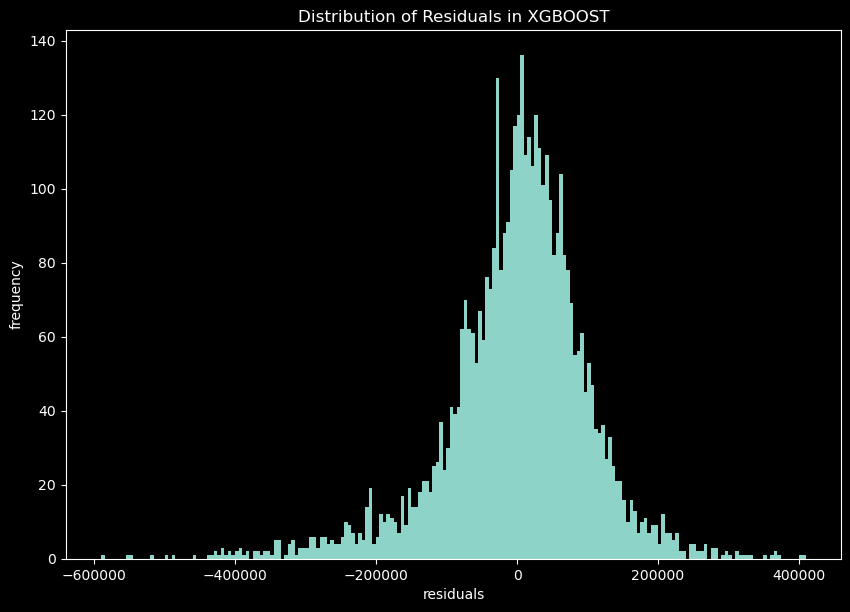

In [28]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in XGBOOST')
plt.show()

# RESULT

On Evaluating the model using the above three methods, the results obtained are as follows:
1. Random Forest was more accurate with prediction accuracy of 89.90%*
2. Linear Regression comes next to Random Forest with accuracy of 84.71%
3. XBoost comes at last with accuracy of 83.21%

As Random Forest has the greatest accuracy we go with Random Forest for prediction.

# PREDICTOR


In [29]:
input = [[4,4.5,5420,101930,1,0,10,3890,1530,17,47.6561,-122.005,4760,101930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0]]
output=reg.predict(scaler.transform(np.array(input)))
print("Predicted Price of the House : Rs",str(output)[1:-1])

Predicted Price of the House : Rs 1114611.02
